In [128]:
!pip install mediapipe opencv-python pandas scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [129]:
pip install -U scikit-learn scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 857.2 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 3.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import mediapipe as mp
import cv2 

In [32]:
# Drawing helpers and Mediapipe Solutions
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic 

## 1. Dibujar landmarks con mediapipe 

In [132]:
# Inicializa la captura de video desde la webcam
cap = cv2.VideoCapture(0)

# Inicia el modelo Holistic de mediapipe para la detección de landmarks
# Los argumentos  min_detection_confidence y min_tracking_confidence  establecen los umbrales de confianza mínimos requeridos 
#para la detección y el seguimiento de landmarks en una imagen.
#min_detection_confidence: Este argumento establece el umbral de confianza mínimo necesario para que el modelo Holistic detecte un landmark en la imagen. Un valor más alto significa que el modelo solo detectará landmarks con una confianza muy alta, mientras que un valor más bajo permitirá detectar landmarks con una confianza más baja.
#min_tracking_confidence: Este argumento establece el umbral de confianza mínimo para el seguimiento de landmarks en imágenes sucesivas. Una vez que un landmark ha sido detectado en una imagen con una confianza superior a este umbral, el modelo intentará seguir ese landmark en imágenes posteriores. Un valor más alto aquí significa que el seguimiento se realizará solo para landmarks muy confiables, mientras que un valor más bajo permitirá un seguimiento incluso para landmarks menos confiables.
# Factore: buena iluminación, fondo simple, si se requiere precision : usar valores mas alto
# Un valor muy alto de confianza puede conducir a una menor cantidad de landmarks detectados y seguidos, lo que puede ser aceptable en algunos casos pero limitante en otros donde se necesite información más detallada.
#min_detection_confidence: deteccion
#min_tracking_confidence: seguimiento
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.6) as holistic: #probar: min_detection_confidence=0.7-0.9, min_tracking_confidence=0.5-0.8   0.5 y 0.8
    while cap.isOpened():  # Bucle principal para procesar cada fotograma de video
        ret, frame = cap.read()  # Lee un fotograma de la webcam
        
        # Recolor Feed
        # Convierte el fotograma de BGR a RGB para el procesamiento de mediapipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False   # Marca la imagen como no modificable   
        
        # Make Detections
        # Procesa la imagen utilizando el modelo Holistic para detectar landmarks
        results = holistic.process(image)
        # print(results.face_landmarks) # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        # Muestra la imagen con los landmarks dibujados en una ventana
        cv2.imshow('Rosa Webcam', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [133]:
results.pose_landmarks

landmark {
  x: 0.57037145
  y: 0.6873029
  z: -0.6856758
  visibility: 0.9999716
}
landmark {
  x: 0.60380375
  y: 0.60369605
  z: -0.6380877
  visibility: 0.99993104
}
landmark {
  x: 0.62408423
  y: 0.6039457
  z: -0.63769394
  visibility: 0.99992675
}
landmark {
  x: 0.64527
  y: 0.6054025
  z: -0.63748634
  visibility: 0.9999211
}
landmark {
  x: 0.53439873
  y: 0.6009239
  z: -0.6374336
  visibility: 0.9999453
}
landmark {
  x: 0.5115608
  y: 0.60086644
  z: -0.63636214
  visibility: 0.9999475
}
landmark {
  x: 0.49153852
  y: 0.60181254
  z: -0.6365465
  visibility: 0.99995244
}
landmark {
  x: 0.67697406
  y: 0.6434162
  z: -0.31131518
  visibility: 0.99990886
}
landmark {
  x: 0.46387967
  y: 0.64159304
  z: -0.29931778
  visibility: 0.9999618
}
landmark {
  x: 0.6061746
  y: 0.80100167
  z: -0.5617591
  visibility: 0.9999484
}
landmark {
  x: 0.5329732
  y: 0.79118747
  z: -0.55766135
  visibility: 0.99996185
}
landmark {
  x: 0.79834056
  y: 1.0917279
  z: -0.12216238
  visi

In [134]:
results.face_landmarks.landmark[0].visibility # visibility muestra si el landmark si se muestra en la pantalla o no
# para los landmarks de la cara siempre sera cero

0.0

## 2. Capturar Landmarks & Exportar CSV

In [135]:
import csv
import os
import numpy as np

In [136]:
num_coords = len(results.face_landmarks.landmark) + len(results.pose_landmarks.landmark)
num_coords 

501

In [137]:
#Crear encabezado de la tabla | class | x | y | z | visibility |
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [138]:
len(landmarks) #2005

2005

In [139]:
#Export header CSV
with open('temporalidad_1_0.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

## 3. Tomar coordenadas de señas

In [140]:
#Save coord poses
class_name="aveces"

#Detectar puntos de referencia
cap = cv2.VideoCapture(0)  #0 o 2

# Inicializar el tiempo de inicio
inicio_tiempo = cv2.getTickCount()

# Initiate holistic model
#min_detection_confidence: deteccion
#min_tracking_confidence: seguimiento
with mp_holistic.Holistic(min_detection_confidence=0.9, min_tracking_confidence=0.8) as holistic: #probar: min_detection_confidence=0.7-0.9, min_tracking_confidence=0.5-0.8

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)

        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )

        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates, da todos los landmarks y los almacena en una matriz
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())

            # Concate rows
            row = pose_row+face_row

            # Append class name
            row.insert(0, class_name)

            # Export to CSV
            with open('temporalidad_1_0.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row)

        except:
            pass

        ##cv2.imshow('Rosa Webcam', image)
        ##if cv2.waitKey(10) & 0xFF == ord('q'):
        ##    break
        # Calcular el tiempo transcurrido
        tiempo_transcurrido = (cv2.getTickCount() - inicio_tiempo) / cv2.getTickFrequency()

        # Mostrar la imagen y salir si pasa el tiempo límite o se presiona 'q'
        cv2.imshow('Rosa Webcam', image)
        if tiempo_transcurrido >= 60 or cv2.waitKey(10) & 0xFF == ord('q'):
            break
        

cap.release()
cv2.destroyAllWindows()


## 4. Entrenar modelo usando Scikit Learn

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/temporalidad_1.csv')

In [3]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,ayer,0.531512,0.444552,-0.628866,0.999982,0.558667,0.390358,-0.571893,0.999950,0.573240,...,0.002032,0.0,0.586263,0.369453,0.015787,0.0,0.591011,0.364649,0.016186,0.0
1,ayer,0.523760,0.446381,-0.863971,0.999979,0.555421,0.390054,-0.809736,0.999940,0.570746,...,0.002171,0.0,0.585872,0.367204,0.016905,0.0,0.590366,0.363378,0.017241,0.0
2,ayer,0.520142,0.449467,-0.910053,0.999976,0.553396,0.390142,-0.857819,0.999930,0.569037,...,0.002352,0.0,0.585525,0.366949,0.017286,0.0,0.589961,0.363065,0.017627,0.0
3,ayer,0.518826,0.453118,-0.833561,0.999973,0.552243,0.391160,-0.780878,0.999921,0.567922,...,0.002106,0.0,0.586479,0.367533,0.016694,0.0,0.590912,0.363730,0.017028,0.0
4,ayer,0.516062,0.455297,-0.796919,0.999972,0.550848,0.391820,-0.745363,0.999919,0.567112,...,0.002066,0.0,0.586989,0.367449,0.016398,0.0,0.591427,0.363495,0.016752,0.0


In [4]:
df['class'].unique()

array(['ayer', 'hoy', 'dia'], dtype=object)

In [5]:
X = df.drop('class', axis=1) # coordenadas
y = df['class'] # clase

In [6]:
y #X = coords , y = class

0       ayer
1       ayer
2       ayer
3       ayer
4       ayer
        ... 
1320     dia
1321     dia
1322     dia
1323     dia
1324     dia
Name: class, Length: 1325, dtype: object

train_test_split(): dividide los datos en conjuntos de entrenamiento y prueba.
- test_size: Es el tamaño que se desea para el conjunto de prueba. Se establece en 0.3, lo que significa que el 30% de los datos se asignarán al conjunto de prueba, y el 70% restante se utilizará para entrenamiento.
- random_state: Este parámetro se utiliza para inicializar el generador de números aleatorios interno, lo que garantiza que la división de los datos sea reproducible

In [7]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #stratify=y

In [8]:
print(y_train.value_counts())

class
dia     317
hoy     312
ayer    298
Name: count, dtype: int64


In [9]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
420,0.532516,0.401962,-0.649718,0.999973,0.556164,0.352373,-0.588069,0.999937,0.570132,0.353572,...,0.004628,0.0,0.589369,0.351943,0.018416,0.0,0.593936,0.347633,0.019013,0.0
621,0.551225,0.409746,-0.690436,0.999963,0.578921,0.360940,-0.628988,0.999923,0.591406,0.362773,...,0.001813,0.0,0.608836,0.349874,0.016117,0.0,0.613444,0.345287,0.016533,0.0
466,0.544121,0.403977,-0.721160,0.999972,0.574794,0.358771,-0.655758,0.999941,0.588049,0.361732,...,-0.002107,0.0,0.595127,0.345919,0.005042,0.0,0.599825,0.341480,0.004883,0.0
55,0.507537,0.411230,-0.621277,0.999983,0.536405,0.363347,-0.570528,0.999952,0.552504,0.363680,...,0.003391,0.0,0.566204,0.364068,0.011487,0.0,0.571177,0.357798,0.011811,0.0
485,0.543258,0.407725,-0.719867,0.999962,0.571385,0.356232,-0.658040,0.999920,0.584950,0.359154,...,0.000471,0.0,0.594372,0.350297,0.007706,0.0,0.599615,0.343755,0.007886,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,0.490424,0.420074,-0.543630,0.999996,0.521282,0.377204,-0.478896,0.999986,0.533549,0.378703,...,0.001541,0.0,0.547362,0.367238,0.010769,0.0,0.551259,0.364032,0.010695,0.0
287,0.515270,0.418557,-0.708685,0.999970,0.545959,0.361765,-0.653881,0.999918,0.560827,0.362682,...,0.003466,0.0,0.581997,0.340567,0.014110,0.0,0.586971,0.336186,0.014373,0.0
194,0.533993,0.387171,-0.686347,0.999982,0.558964,0.345014,-0.618827,0.999955,0.572094,0.348150,...,0.003715,0.0,0.584498,0.343905,0.015795,0.0,0.588968,0.340684,0.016142,0.0
309,0.524198,0.415855,-0.686689,0.999961,0.554085,0.364286,-0.622414,0.999896,0.568708,0.365653,...,0.004476,0.0,0.590145,0.339858,0.015004,0.0,0.594931,0.335507,0.015295,0.0


In [10]:
y_train

420     ayer
621      hoy
466      hoy
55      ayer
485      hoy
        ... 
1282     dia
287     ayer
194     ayer
309     ayer
799      hoy
Name: class, Length: 927, dtype: object

In [11]:
df #DataSet completo

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,ayer,0.531512,0.444552,-0.628866,0.999982,0.558667,0.390358,-0.571893,0.999950,0.573240,...,0.002032,0.0,0.586263,0.369453,0.015787,0.0,0.591011,0.364649,0.016186,0.0
1,ayer,0.523760,0.446381,-0.863971,0.999979,0.555421,0.390054,-0.809736,0.999940,0.570746,...,0.002171,0.0,0.585872,0.367204,0.016905,0.0,0.590366,0.363378,0.017241,0.0
2,ayer,0.520142,0.449467,-0.910053,0.999976,0.553396,0.390142,-0.857819,0.999930,0.569037,...,0.002352,0.0,0.585525,0.366949,0.017286,0.0,0.589961,0.363065,0.017627,0.0
3,ayer,0.518826,0.453118,-0.833561,0.999973,0.552243,0.391160,-0.780878,0.999921,0.567922,...,0.002106,0.0,0.586479,0.367533,0.016694,0.0,0.590912,0.363730,0.017028,0.0
4,ayer,0.516062,0.455297,-0.796919,0.999972,0.550848,0.391820,-0.745363,0.999919,0.567112,...,0.002066,0.0,0.586989,0.367449,0.016398,0.0,0.591427,0.363495,0.016752,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,dia,0.516493,0.421910,-0.460287,0.999991,0.539374,0.378749,-0.385085,0.999971,0.551238,...,0.002838,0.0,0.552474,0.370528,0.017209,0.0,0.556981,0.366716,0.017499,0.0
1321,dia,0.515942,0.421953,-0.460095,0.999991,0.539032,0.378812,-0.384786,0.999971,0.550884,...,0.002418,0.0,0.551783,0.369286,0.017061,0.0,0.556138,0.365578,0.017370,0.0
1322,dia,0.515497,0.421984,-0.455607,0.999991,0.538681,0.378851,-0.379965,0.999970,0.550436,...,0.003250,0.0,0.550966,0.373498,0.016973,0.0,0.555703,0.368330,0.017464,0.0
1323,dia,0.515215,0.422034,-0.453615,0.999991,0.538478,0.378901,-0.378694,0.999970,0.550230,...,0.002644,0.0,0.551565,0.369392,0.016935,0.0,0.555970,0.365739,0.017191,0.0


## Enrenamiento modelos de clasificación de aprendizaje automático

In [12]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [13]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=500)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'svm':make_pipeline(StandardScaler(), SVC())
}

In [14]:
pipelines.keys()

dict_keys(['lr', 'rc', 'rf', 'gb', 'svm'])

In [15]:
list(pipelines.values())[0]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=500))])

## Entrenamiento de los 5 modelos de clasificacion

In [16]:
print(y_train.value_counts())

class
dia     317
hoy     312
ayer    298
Name: count, dtype: int64


In [17]:
print(X_train.value_counts())

x1        y1        z1         v1        x2        y2        z2         v2        x3        y3        z3         v3        x4        y4        z4         v4        x5        y5        z5         v5        x6        y6        z6         v6        x7        y7        z7         v7        x8        y8        z8         v8        x9        y9        z9         v9        x10       y10       z10        v10       x11       y11       z11        v11       x12       y12       z12        v12       x13       y13       z13        v13       x14       y14       z14        v14       x15       y15       z15        v15       x16       y16       z16        v16       x17       y17       z17        v17       x18       y18       z18        v18       x19       y19       z19        v19       x20       y20       z20        v20       x21       y21       z21        v21       x22       y22       z22        v22       x23       y23       z23        v23       x24       y24       z24        v24       x25       y25   

In [18]:
fit_models = {}
for clave_model, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[clave_model] =  model
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=500))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])}

## Predicciones para evaluar modelos

In [19]:
# Realizar predicciones para cada modelo
y_pred = model.predict(X_test) 
y_pred

array(['hoy', 'dia', 'ayer', 'hoy', 'hoy', 'dia', 'ayer', 'hoy', 'ayer',
       'hoy', 'hoy', 'dia', 'dia', 'hoy', 'ayer', 'dia', 'ayer', 'dia',
       'ayer', 'ayer', 'hoy', 'ayer', 'hoy', 'dia', 'ayer', 'hoy', 'dia',
       'dia', 'ayer', 'dia', 'hoy', 'ayer', 'hoy', 'hoy', 'dia', 'dia',
       'hoy', 'dia', 'ayer', 'hoy', 'ayer', 'hoy', 'hoy', 'hoy', 'ayer',
       'hoy', 'hoy', 'dia', 'dia', 'dia', 'ayer', 'hoy', 'ayer', 'dia',
       'dia', 'ayer', 'ayer', 'hoy', 'ayer', 'ayer', 'ayer', 'dia', 'dia',
       'ayer', 'ayer', 'dia', 'dia', 'dia', 'dia', 'ayer', 'ayer', 'ayer',
       'hoy', 'hoy', 'ayer', 'hoy', 'ayer', 'ayer', 'dia', 'dia', 'hoy',
       'hoy', 'ayer', 'ayer', 'ayer', 'hoy', 'ayer', 'hoy', 'hoy', 'hoy',
       'dia', 'hoy', 'hoy', 'hoy', 'hoy', 'hoy', 'ayer', 'dia', 'dia',
       'ayer', 'ayer', 'dia', 'ayer', 'hoy', 'ayer', 'ayer', 'hoy',
       'ayer', 'dia', 'dia', 'dia', 'dia', 'hoy', 'ayer', 'dia', 'hoy',
       'dia', 'hoy', 'hoy', 'ayer', 'hoy', 'ayer', 'ayer

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score #Metricas

### Metricas: Accuracy

In [22]:
for clave_model, model in fit_models.items():
    print ("Accuracy: ", clave_model, accuracy_score(y_test,y_pred))

Accuracy:  lr 0.9949748743718593
Accuracy:  rc 0.9949748743718593
Accuracy:  rf 0.9949748743718593
Accuracy:  gb 0.9949748743718593
Accuracy:  svm 0.9949748743718593


### Metricas: Precision

In [23]:
print(f"Tamaño de y_test: {len(y_test)}")
print(f"Tamaño de y_pred: {len(y_pred)}")


Tamaño de y_test: 398
Tamaño de y_pred: 398


In [24]:
for clave_model, model in fit_models.items():
    print ("Precisión: ", clave_model, precision_score(y_test, y_pred, average='macro'))

Precisión:  lr 0.9943977591036415
Precisión:  rc 0.9943977591036415
Precisión:  rf 0.9943977591036415
Precisión:  gb 0.9943977591036415
Precisión:  svm 0.9943977591036415


### Recall

In [25]:
for clave_model, model in fit_models.items():
    print ("Recall: ", clave_model, recall_score(y_test, y_pred, average='macro'))

Recall:  lr 0.9950980392156863
Recall:  rc 0.9950980392156863
Recall:  rf 0.9950980392156863
Recall:  gb 0.9950980392156863
Recall:  svm 0.9950980392156863


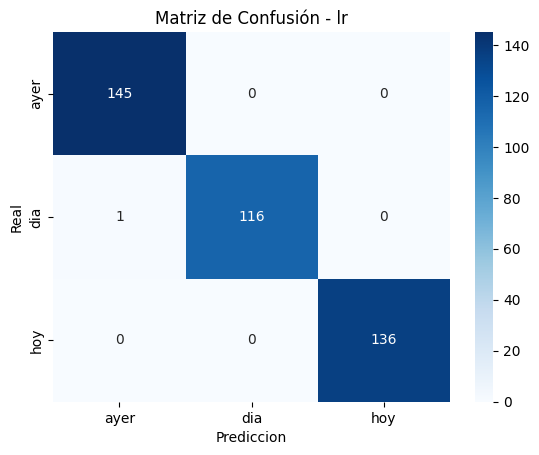

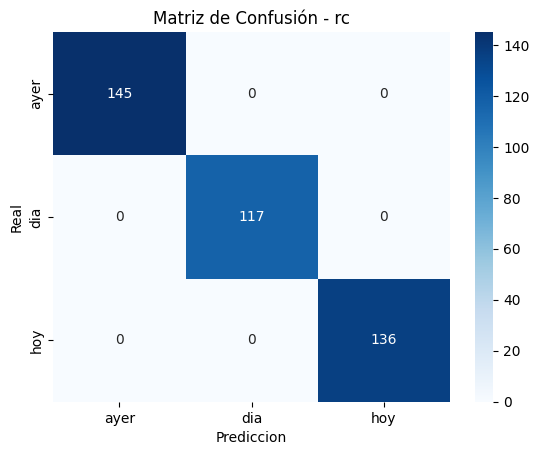

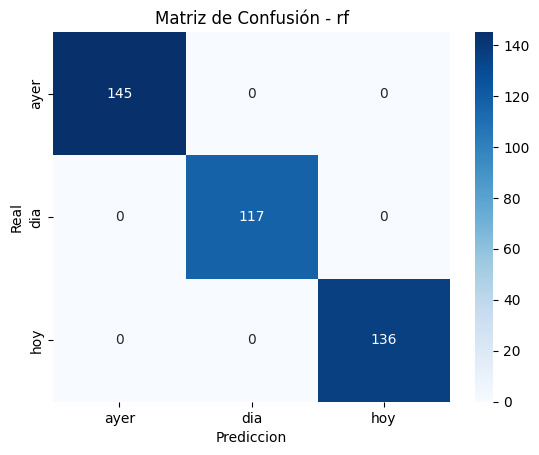

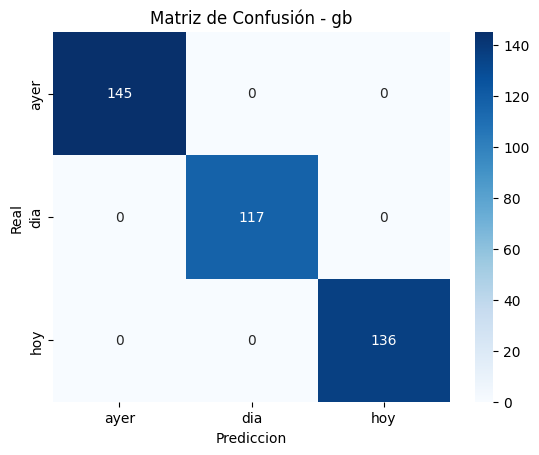

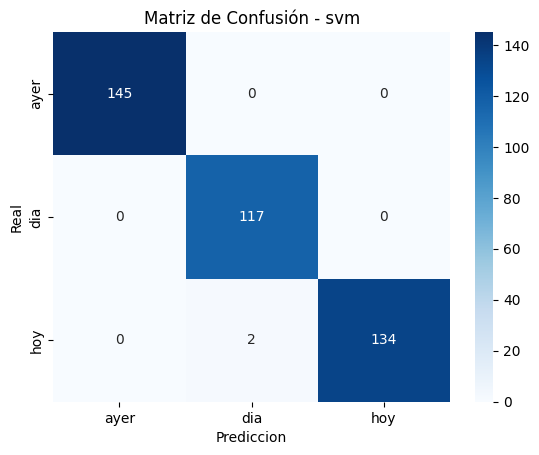

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_labels = []

# Matriz de confusión para cada modelo
for algo, model in fit_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_,
            yticklabels=model.classes_)
    plt.xlabel('Prediccion')
    plt.ylabel('Real')
    plt.title(f"Matriz de Confusión - {algo}")
    plt.show()


## Curvas de aprendizaje

In [27]:
print(X.value_counts())

x1        y1        z1         v1        x2        y2        z2         v2        x3        y3        z3         v3        x4        y4        z4         v4        x5        y5        z5         v5        x6        y6        z6         v6        x7        y7        z7         v7        x8        y8        z8         v8        x9        y9        z9         v9        x10       y10       z10        v10       x11       y11       z11        v11       x12       y12       z12        v12       x13       y13       z13        v13       x14       y14       z14        v14       x15       y15       z15        v15       x16       y16       z16        v16       x17       y17       z17        v17       x18       y18       z18        v18       x19       y19       z19        v19       x20       y20       z20        v20       x21       y21       z21        v21       x22       y22       z22        v22       x23       y23       z23        v23       x24       y24       z24        v24       x25       y25   

In [28]:
print(y.value_counts())

class
hoy     448
ayer    443
dia     434
Name: count, dtype: int64


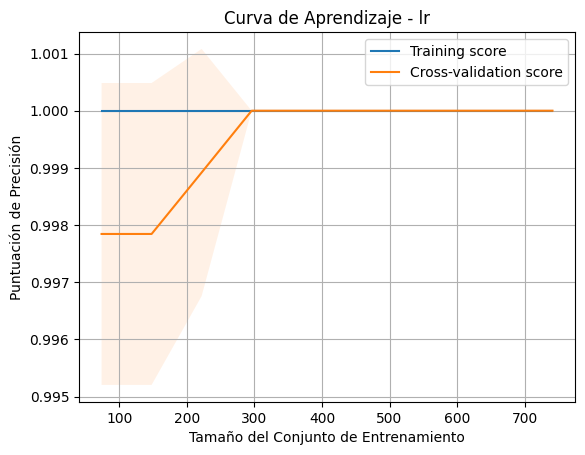

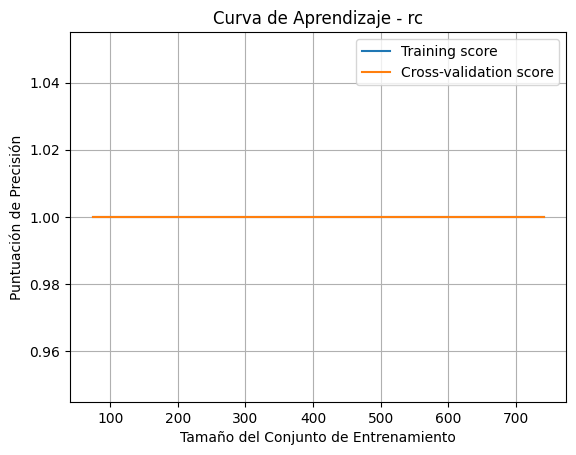

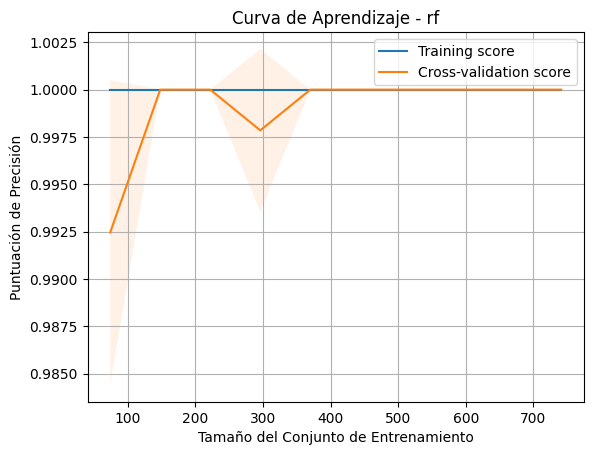

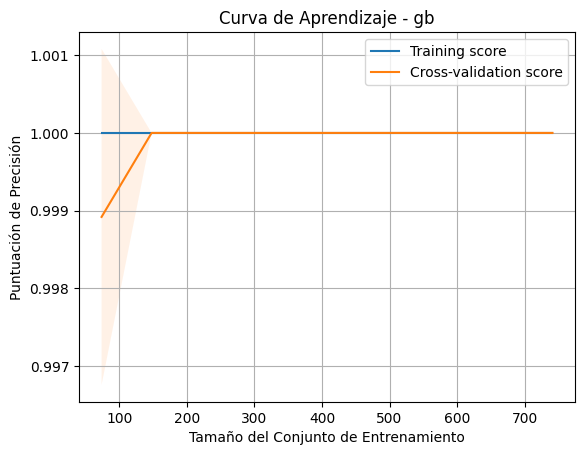

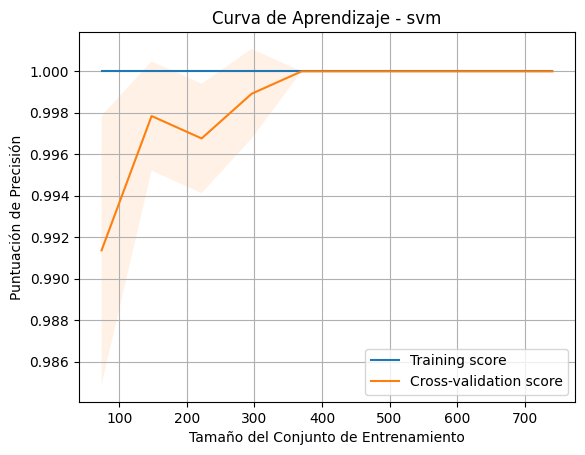

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Crear curvas de aprendizaje para cada modelo
for algo, model in fit_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calcular la media y la desviación estándar de los puntajes
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.title(f"Curva de Aprendizaje - {algo}")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación de Precisión")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


In [37]:
print(y_train.value_counts())

class
dia     317
hoy     312
ayer    298
Name: count, dtype: int64


In [30]:
import pickle
# Guardar el modelo ya entrenado
with open('models_2/temporalidad_1.pkl', 'wb') as f: 
    pickle.dump(fit_models['lr'], f) 

## Cargar el modelo ya entrenado

In [83]:
pip install --upgrade scikit-learn



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import mediapipe as mp
import pandas as pd
import cv2 
import numpy as np
import pickle 

In [38]:
with open('models_2/temporalidad_1.pkl', 'rb') as f:
    model = pickle.load(f)
    print("Modelo cargado")

mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic 


cap = cv2.VideoCapture(0)
# Initiate holistic model

with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.6) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = pose_row+face_row

            X = pd.DataFrame([row])
            print("X head\n")
            print(X.head())

            print("Contenido de 'row':", row)

            print("X colums: ",X.columns) 

            
            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, ''
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, ''
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except Exception as e:
            print(f"Error: {e}")
                        
        cv2.imshow('Rosa Webcam', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Modelo cargado
Error: 'NoneType' object has no attribute 'landmark'
X head

       0        1         2         3        4         5         6     \
0  0.593854  0.63157 -1.107495  0.999969  0.61279  0.551283 -1.043095   

       7         8         9     ...      1994  1995     1996      1997  \
0  0.999944  0.627821  0.550733  ... -0.004227   0.0  0.65174  0.546858   

       1998  1999      2000      2001      2002  2003  
0  0.021411   0.0  0.656863  0.538069  0.022243   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.593853771686554, 0.6315703392028809, -1.1074953079223633, 0.9999691247940063, 0.6127895712852478, 0.5512830018997192, -1.0430947542190552, 0.999943733215332, 0.6278213858604431, 0.5507334470748901, -1.0432424545288086, 0.9999465942382812, 0.6426566243171692, 0.5503979921340942, -1.043386697769165, 0.9999169111251831, 0.5532273054122925, 0.5563744306564331, -1.0499298572540283, 0.9999368190765381, 0.5300986766815186, 0.5604109764099121, -1.049207091331482, 0.9999

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2        3         4         5         6     \
0  0.567428  0.607633 -1.392766  0.99991  0.587273  0.536257 -1.330572   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999901  0.605427  0.535586  ...  0.004299   0.0  0.611254  0.506527   

       1998  1999      2000      2001      2002  2003  
0  0.027924   0.0  0.615738  0.498572  0.028956   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5674281716346741, 0.6076334714889526, -1.3927663564682007, 0.9999104738235474, 0.5872731804847717, 0.5362569093704224, -1.3305717706680298, 0.9999006986618042, 0.605426549911499, 0.5355864763259888, -1.3310010433197021, 0.999900221824646, 0.6207615733146667, 0.5352683663368225, -1.3311889171600342, 0.9998770952224731, 0.5316112637519836, 0.5426669716835022, -1.340775966644287, 0.9998918175697327, 0.5142478346824646, 0.547513484954834, -1.3411256074905396, 0.9998963475227356, 0.4990955889225006, 0.5520058274269104, -1.3414914

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.543282  0.591072 -1.269843  0.999843  0.564839  0.522315 -1.214375   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999792  0.583754  0.521302  ...  0.004977   0.0  0.589979  0.498576   

       1998  1999      2000     2001      2002  2003  
0  0.026333   0.0  0.594424  0.49168  0.027284   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5432817935943604, 0.5910717248916626, -1.2698426246643066, 0.9998431205749512, 0.5648393034934998, 0.5223154425621033, -1.2143747806549072, 0.9997916221618652, 0.5837539434432983, 0.5213019847869873, -1.2161638736724854, 0.9998118281364441, 0.6002307534217834, 0.5214144587516785, -1.216651439666748, 0.9997729063034058, 0.5117286443710327, 0.5307254195213318, -1.197741150856018, 0.9997735619544983, 0.4959622919559479, 0.5359468460083008, -1.1983522176742554, 0.9997951984405518, 0.48185333609580994, 0.5408810377120972, -1.1993

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.543308  0.594012 -1.146456  0.999819  0.564548  0.523378 -1.090978   

      7        8         9     ...      1994  1995      1996      1997  \
0  0.99975  0.58251  0.522582  ...  0.006462   0.0  0.595353  0.531169   

       1998  1999      2000     2001      2002  2003  
0  0.026868   0.0  0.599663  0.52536  0.027767   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5433081388473511, 0.5940117835998535, -1.1464563608169556, 0.9998189806938171, 0.5645475387573242, 0.5233778953552246, -1.090977668762207, 0.9997499585151672, 0.5825103521347046, 0.5225818753242493, -1.0921276807785034, 0.99978107213974, 0.5982306599617004, 0.5227028727531433, -1.0924495458602905, 0.9997319579124451, 0.5120616555213928, 0.5318281650543213, -1.083454966545105, 0.9997251033782959, 0.4962426722049713, 0.5369979739189148, -1.0833040475845337, 0.9997580051422119, 0.4829959273338318, 0.541773796081543, -1.083986520767

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.548266  0.595944 -1.087095  0.999827  0.569498  0.523667 -1.025456   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999755  0.586915  0.522815  ...  0.004654   0.0  0.608311  0.535066   

       1998  1999      2000      2001      2002  2003  
0  0.024198   0.0  0.612338  0.529673  0.024946   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5482661128044128, 0.5959441065788269, -1.0870945453643799, 0.9998272657394409, 0.5694975256919861, 0.5236672163009644, -1.025456428527832, 0.9997546672821045, 0.586915135383606, 0.5228150486946106, -1.0261019468307495, 0.9997887015342712, 0.6016921997070312, 0.522914469242096, -1.02626371383667, 0.9997376799583435, 0.5160213112831116, 0.5323264002799988, -1.0218336582183838, 0.9997279644012451, 0.49900898337364197, 0.53764808177948, -1.0212358236312866, 0.999764621257782, 0.4847193658351898, 0.5424109101295471, -1.02168941

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[0.5514922738075256, 0.5557431578636169, -1.0364818572998047, 0.9998257160186768, 0.5723008513450623, 0.4886772930622101, -0.9703965187072754, 0.9997401833534241, 0.5895876288414001, 0.48832541704177856, -0.9709252119064331, 0.9997744560241699, 0.604435920715332, 0.48812174797058105, -0.9710546731948853, 0.999718964099884, 0.5182510018348694, 0.4937663674354553, -0.9703272581100464, 0.9997156858444214, 0.5003870725631714, 0.49774861335754395, -0.9697203636169434, 0.9997552037239075, 0.48523035645484924, 0.5008170008659363, -0.9701751470565796, 0.9997254014015198, 0.6264473795890808, 0.5297202467918396, -0.5761086940765381, 0.9997679591178894, 0.4650990962982178, 0.5460164546966553, -0.5539439916610718, 0.999809741973877, 0.5850924253463745, 0.6421886086463928, -0.8912364840507507, 0.9998445510864258, 0.5183039903640747, 0.6447470188140869, -0.8851057887077332, 0.9998441934585571, 0.7641141414642334, 0.9708734154701233, -0.33919060230255127, 0.9922184944152832, 0.3615221679210663, 0.964

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

      0         1         2         3         4         5         6     \
0  0.55459  0.415308 -0.964677  0.999825  0.575251  0.339946 -0.903351   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999725  0.591533  0.339888  ... -0.001302   0.0  0.617598  0.342524   

       1998  1999      2000      2001      2002  2003  
0  0.018149   0.0  0.621561  0.336337  0.018707   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5545900464057922, 0.4153081178665161, -0.9646772146224976, 0.9998251795768738, 0.5752509236335754, 0.33994588255882263, -0.9033506512641907, 0.9997252225875854, 0.5915331244468689, 0.3398880362510681, -0.9036615490913391, 0.9997590780258179, 0.6060827374458313, 0.33983293175697327, -0.9037678837776184, 0.9997022747993469, 0.5210174322128296, 0.34287887811660767, -0.9089564085006714, 0.9996987581253052, 0.5027602910995483, 0.34530165791511536, -0.9083486795425415, 0.9997396469116211, 0.4868558943271637, 0.34927862882614136, -

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

     0         1        2         3         4         5         6     \
0  0.5528  0.446718 -0.75652  0.999838  0.576141  0.373727 -0.691675   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999741  0.592313  0.372637  ... -0.001484   0.0  0.618868  0.375633   

       1998  1999      2000      2001     2002  2003  
0  0.017291   0.0  0.622916  0.369175  0.01789   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5527998208999634, 0.4467180371284485, -0.7565203905105591, 0.9998380541801453, 0.5761406421661377, 0.3737266957759857, -0.691674530506134, 0.9997411370277405, 0.5923129916191101, 0.3726370930671692, -0.6915781497955322, 0.999767541885376, 0.6065406799316406, 0.3721260130405426, -0.6914993524551392, 0.9997152090072632, 0.5211900472640991, 0.3817370533943176, -0.6904113292694092, 0.9997198581695557, 0.5027022361755371, 0.38628196716308594, -0.6898810267448425, 0.9997572898864746, 0.4870672821998596, 0.3912414014339447, -0.6903576254

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ayer [9.99999869e-01 9.45196903e-28 1.31073213e-07]
X head

       0         1        2         3         4         5         6     \
0  0.567504  0.431972 -0.88095  0.999834  0.586983  0.369023 -0.808525   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999704  0.600475  0.368583  ...  0.000196   0.0  0.620911  0.353659   

       1998  1999      2000      2001      2002  2003  
0  0.017347   0.0  0.625369  0.346934  0.017878   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5675035715103149, 0.4319724142551422, -0.8809499740600586, 0.9998342394828796, 0.5869830846786499, 0.3690229058265686, -0.8085249066352844, 0.9997040033340454, 0.6004751324653625, 0.3685830533504486, -0.8085217475891113, 0.9997067451477051, 0.6134914755821228, 0.3689618706703186, -0.8085190057754517, 0.9996492862701416, 0.5401633977890015, 0.375820130109787, -0.8180944323539734, 0.9997034072875977, 0.522642970085144, 0.38029539585113525, -0.817730724811554, 0.99974191188812

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ayer [9.99999904e-01 5.27862228e-28 9.57298670e-08]
X head

       0         1         2         3         4         5         6     \
0  0.569762  0.442471 -0.901368  0.999828  0.591869  0.374037 -0.828306   

       7         8        9     ...      1994  1995      1996     1997  \
0  0.999689  0.605366  0.37382  ... -0.000845   0.0  0.632196  0.36868   

      1998  1999      2000      2001      2002  2003  
0  0.01668   0.0  0.636467  0.361223  0.017282   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5697615742683411, 0.442471444606781, -0.9013675451278687, 0.9998279809951782, 0.5918694734573364, 0.3740366995334625, -0.8283063173294067, 0.9996885657310486, 0.6053657531738281, 0.3738195300102234, -0.828272819519043, 0.9996575117111206, 0.6192277669906616, 0.3740740418434143, -0.8282920718193054, 0.9996150135993958, 0.5436419248580933, 0.37986522912979126, -0.8354858160018921, 0.9996995329856873, 0.5256136655807495, 0.38380691409111023, -0.8352189064025879, 0.9997276663780212

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ayer [9.99979499e-01 1.12476965e-27 2.05005100e-05]
X head

       0         1         2         3         4         5         6     \
0  0.574887  0.449284 -0.943863  0.999837  0.597839  0.378215 -0.847978   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999704  0.610933  0.378748  ... -0.002228   0.0  0.634633  0.368018   

       1998  1999      2000      2001      2002  2003  
0  0.015254   0.0  0.638658  0.361922  0.015671   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5748871564865112, 0.44928449392318726, -0.9438632130622864, 0.9998366236686707, 0.5978387594223022, 0.3782145082950592, -0.8479776382446289, 0.9997044801712036, 0.6109327077865601, 0.37874841690063477, -0.847443699836731, 0.9996654987335205, 0.624911904335022, 0.3798525035381317, -0.8470721244812012, 0.9996267557144165, 0.5511667728424072, 0.381880521774292, -0.8675068616867065, 0.9997192025184631, 0.533841609954834, 0.3850594460964203, -0.8676964044570923, 0.999744176864

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ayer [9.99940023e-01 2.46859465e-27 5.99769847e-05]
X head

       0         1         2         3         4         5         6     \
0  0.574692  0.452035 -0.984468  0.999849  0.598204  0.377259 -0.890905   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999726  0.611308  0.377214  ... -0.001062   0.0  0.629841  0.365856   

       1998  1999      2000      2001      2002  2003  
0  0.015746   0.0  0.633955  0.358945  0.016187   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.574691653251648, 0.45203468203544617, -0.9844681024551392, 0.9998488426208496, 0.5982043743133545, 0.3772593140602112, -0.8909046053886414, 0.999725878238678, 0.6113079786300659, 0.3772142231464386, -0.8904002904891968, 0.9996868371963501, 0.6253198981285095, 0.37784847617149353, -0.8900349736213684, 0.9996511340141296, 0.5507200956344604, 0.38244399428367615, -0.9062474370002747, 0.9997413158416748, 0.5332610011100769, 0.38599133491516113, -0.906225860118866, 0.999763965

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ayer [9.99983910e-01 1.06899362e-27 1.60901539e-05]
X head

       0        1         2         3         4         5         6     \
0  0.574301  0.44623 -1.054284  0.999859  0.597979  0.372987 -0.960771   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999744  0.611085  0.373225  ...  0.000403   0.0  0.626926  0.366906   

       1998  1999      2000      2001      2002  2003  
0  0.017973   0.0  0.630943  0.360281  0.018508   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5743013024330139, 0.4462295472621918, -1.0542837381362915, 0.999858558177948, 0.5979791283607483, 0.37298712134361267, -0.9607709646224976, 0.999743640422821, 0.6110854744911194, 0.3732250928878784, -0.9604307413101196, 0.9997026324272156, 0.6248698830604553, 0.3737491965293884, -0.9600650668144226, 0.9996703267097473, 0.5502957105636597, 0.37782809138298035, -0.9673048257827759, 0.9997597932815552, 0.5327175259590149, 0.38162562251091003, -0.967180073261261, 0.999780058860

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ayer [9.99996287e-01 3.77359078e-27 3.71309094e-06]
X head

       0         1         2        3         4         5         6     \
0  0.571794  0.447063 -1.152065  0.99987  0.596653  0.373031 -1.068901   

       7         8        9     ...     1994  1995      1996      1997  \
0  0.999764  0.610151  0.37298  ...  0.00023   0.0  0.619478  0.367925   

      1998  1999      2000      2001      2002  2003  
0  0.01701   0.0  0.623456  0.361468  0.017447   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5717938542366028, 0.44706302881240845, -1.152065396308899, 0.9998703002929688, 0.5966529846191406, 0.37303078174591064, -1.0689008235931396, 0.999764084815979, 0.6101514101028442, 0.3729797899723053, -1.0684127807617188, 0.9997249245643616, 0.6234238743782043, 0.3733732998371124, -1.0682055950164795, 0.9996955394744873, 0.5482046008110046, 0.37903666496276855, -1.0747172832489014, 0.9997797012329102, 0.5303131341934204, 0.38338571786880493, -1.0743095874786377, 0.9997978806495667

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.571134  0.447687 -1.139094  0.999878  0.596309  0.374512 -1.047971   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999779  0.609691  0.374785  ...  0.001677   0.0  0.619152  0.371077   

       1998  1999      2000      2001      2002  2003  
0  0.020163   0.0  0.623169  0.365294  0.020677   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5711336731910706, 0.4476868212223053, -1.1390941143035889, 0.9998781085014343, 0.5963089466094971, 0.37451231479644775, -1.0479705333709717, 0.9997787475585938, 0.6096907258033752, 0.3747853636741638, -1.0475670099258423, 0.9997389912605286, 0.6225272417068481, 0.37554147839546204, -1.0475012063980103, 0.9997134804725647, 0.5478169322013855, 0.37905654311180115, -1.0603104829788208, 0.9997940063476562, 0.529986560344696, 0.3827490508556366, -1.0599743127822876, 0.999809980392456, 0.5131961107254028, 0.3884565532207489, -1.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.568992  0.449152 -1.135458  0.999884  0.595758  0.376207 -1.047131   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999789  0.609266  0.376351  ...  0.001954   0.0  0.620727  0.374132   

       1998  1999      2000      2001      2002  2003  
0  0.018709   0.0  0.624825  0.368272  0.019088   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5689917802810669, 0.4491521716117859, -1.1354584693908691, 0.9998837113380432, 0.5957579612731934, 0.376206636428833, -1.0471305847167969, 0.9997885227203369, 0.6092656850814819, 0.37635093927383423, -1.0467467308044434, 0.9997468590736389, 0.6219476461410522, 0.3767831027507782, -1.0467661619186401, 0.9997256994247437, 0.5475010275840759, 0.3804634213447571, -1.0553454160690308, 0.9998030066490173, 0.5298022627830505, 0.3839244842529297, -1.054954171180725, 0.9998161196708679, 0.5130741596221924, 0.3893274664878845, -1.05

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2        3         4         5         6     \
0  0.569843  0.445342 -0.994968  0.99988  0.596985  0.375999 -0.915377   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999779  0.610226  0.376839  ...  0.005775   0.0  0.632596  0.351494   

       1998  1999      2000      2001     2002  2003  
0  0.024946   0.0  0.637045  0.343914  0.02585   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5698426961898804, 0.4453422427177429, -0.9949684143066406, 0.9998796582221985, 0.59698486328125, 0.37599948048591614, -0.9153765439987183, 0.9997789263725281, 0.610226035118103, 0.37683871388435364, -0.9148989915847778, 0.9997223019599915, 0.6232706904411316, 0.3779490292072296, -0.9149136543273926, 0.9997100830078125, 0.5490871667861938, 0.37887710332870483, -0.921106219291687, 0.9997997879981995, 0.5325571298599243, 0.3817908763885498, -0.9208351373672485, 0.9998078346252441, 0.5160137414932251, 0.38711875677108765, -0.92110

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.569871  0.446228 -0.962351  0.999882  0.596898  0.377167 -0.883795   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999786  0.610161  0.378644  ...  0.002864   0.0  0.625455  0.378743   

       1998  1999      2000      2001     2002  2003  
0  0.020991   0.0  0.629218  0.371955  0.02178   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5698705911636353, 0.44622835516929626, -0.9623507261276245, 0.9998822808265686, 0.5968981981277466, 0.37716683745384216, -0.8837946057319641, 0.9997857213020325, 0.6101610064506531, 0.37864431738853455, -0.8834947347640991, 0.9997277855873108, 0.6230317950248718, 0.3810584247112274, -0.8836624026298523, 0.9997191429138184, 0.5494186282157898, 0.37963637709617615, -0.8886915445327759, 0.9998056888580322, 0.5329483151435852, 0.38278019428253174, -0.8884685635566711, 0.9998122453689575, 0.5164645910263062, 0.3881186246871948, -

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.576326  0.501189 -0.818094  0.999871  0.599771  0.435551 -0.752143   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999776  0.611991  0.434099  ...  0.002044   0.0  0.627696  0.461626   

       1998  1999      2000      2001      2002  2003  
0  0.017717   0.0  0.631223  0.456218  0.018232   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5763264894485474, 0.5011891722679138, -0.8180937767028809, 0.9998711347579956, 0.5997705459594727, 0.4355510175228119, -0.7521427869796753, 0.9997761845588684, 0.6119909286499023, 0.4340994656085968, -0.752027153968811, 0.9997102618217468, 0.6252189874649048, 0.4335608184337616, -0.7522242069244385, 0.9997115731239319, 0.5552493929862976, 0.4445306658744812, -0.7537307739257812, 0.9997938871383667, 0.5388858914375305, 0.4492977559566498, -0.7534847259521484, 0.9997941851615906, 0.5236149430274963, 0.4553860127925873, -0.75

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3       4         5         6     \
0  0.589922  0.523212 -0.782004  0.999868  0.6096  0.461184 -0.720975   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999781  0.621735  0.461333  ...  0.001758   0.0  0.639824  0.467424   

       1998  1999      2000      2001      2002  2003  
0  0.017215   0.0  0.643208  0.462761  0.017786   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.589921772480011, 0.5232120752334595, -0.7820037603378296, 0.9998675584793091, 0.6096001267433167, 0.46118372678756714, -0.7209751605987549, 0.9997809529304504, 0.6217349171638489, 0.4613330364227295, -0.7208166718482971, 0.9997137188911438, 0.6348356604576111, 0.46214938163757324, -0.7211313843727112, 0.9997219443321228, 0.5702555179595947, 0.4647318124771118, -0.7233149409294128, 0.9997954964637756, 0.5551041960716248, 0.4686760902404785, -0.7228957414627075, 0.9997903108596802, 0.5391958951950073, 0.4736693799495697, -0.7230

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.586729  0.518779 -0.736742  0.999873  0.607734  0.455187 -0.683582   

      7         8       9     ...     1994  1995      1996      1997  \
0  0.99979  0.620287  0.4551  ...  0.00122   0.0  0.627144  0.454209   

       1998  1999      2000      2001      2002  2003  
0  0.014396   0.0  0.630632  0.448446  0.014932   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5867290496826172, 0.5187786817550659, -0.7367417812347412, 0.9998729228973389, 0.6077336668968201, 0.4551871418952942, -0.6835822463035583, 0.9997903108596802, 0.6202867031097412, 0.455099880695343, -0.6832553148269653, 0.9997242093086243, 0.631652295589447, 0.4562533497810364, -0.6835898160934448, 0.9997351169586182, 0.5680810213088989, 0.46065017580986023, -0.6793509721755981, 0.9998032450675964, 0.5533879995346069, 0.46511387825012207, -0.6789374947547913, 0.9997965097427368, 0.5374459028244019, 0.4705275297164917, -0.679148435

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0        1         2         3         4         5        6     \
0  0.571563  0.50491 -0.782981  0.999874  0.592039  0.445241 -0.72219   

       7         8         9     ...      1994  1995     1996      1997  \
0  0.999793  0.606022  0.444286  ...  0.000494   0.0  0.60252  0.408211   

       1998  1999      2000      2001     2002  2003  
0  0.015177   0.0  0.605998  0.402703  0.01564   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.571562647819519, 0.5049101114273071, -0.7829810976982117, 0.9998739361763, 0.592039167881012, 0.44524142146110535, -0.7221899628639221, 0.9997928738594055, 0.6060217022895813, 0.44428551197052, -0.7219365239143372, 0.9997286200523376, 0.6193962693214417, 0.444688618183136, -0.7221677899360657, 0.9997404217720032, 0.5465584993362427, 0.45342880487442017, -0.7246240377426147, 0.9998039603233337, 0.5315154790878296, 0.45784249901771545, -0.7242580652236938, 0.9997968077659607, 0.5173389315605164, 0.4631730914115906, -0.72448879480361

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.562867  0.439555 -0.767881  0.999881  0.579973  0.373527 -0.709655   

     7         8         9     ...      1994  1995      1996      1997  \
0  0.9998  0.595796  0.372092  ...  0.002609   0.0  0.600552  0.327851   

       1998  1999      2000      2001      2002  2003  
0  0.017898   0.0  0.604737  0.321423  0.018624   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5628665089607239, 0.43955549597740173, -0.7678805589675903, 0.9998812675476074, 0.5799733400344849, 0.3735267221927643, -0.7096547484397888, 0.9998001456260681, 0.5957958102226257, 0.37209150195121765, -0.7091518044471741, 0.9997385740280151, 0.6101528406143188, 0.37195807695388794, -0.7092695236206055, 0.9997493624687195, 0.5332038402557373, 0.3867461383342743, -0.7125634551048279, 0.9998143315315247, 0.5189191102981567, 0.3935164213180542, -0.7121531963348389, 0.999808132648468, 0.5048342943191528, 0.40197864174842834, -0.71

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2        3         4         5         6     \
0  0.557518  0.395479 -0.743891  0.99989  0.574704  0.332791 -0.679958   

       7         8        9     ...      1994  1995      1996     1997  \
0  0.999813  0.590894  0.33293  ...  0.002265   0.0  0.607604  0.30332   

       1998  1999      2000      2001      2002  2003  
0  0.019416   0.0  0.611923  0.297138  0.020055   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5575176477432251, 0.3954786956310272, -0.7438912391662598, 0.9998900890350342, 0.574704110622406, 0.3327910304069519, -0.6799584627151489, 0.9998133778572083, 0.5908944606781006, 0.33293014764785767, -0.6794463396072388, 0.999755322933197, 0.6058278679847717, 0.33392059803009033, -0.6795482039451599, 0.99976646900177, 0.5273830890655518, 0.3470297157764435, -0.6832279562950134, 0.9998273849487305, 0.5129174590110779, 0.35462889075279236, -0.6827688813209534, 0.9998209476470947, 0.4992155432701111, 0.3630785346031189, -0.68291634

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.557864  0.399086 -0.782395  0.999896  0.575097  0.336112 -0.715484   

       7       8         9     ...      1994  1995      1996      1997  \
0  0.999822  0.5913  0.337263  ...  0.002035   0.0  0.610714  0.323623   

       1998  1999      2000      2001      2002  2003  
0  0.017737   0.0  0.615127  0.317811  0.018371   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5578644275665283, 0.3990861773490906, -0.7823947668075562, 0.999896228313446, 0.5750974416732788, 0.33611249923706055, -0.715483546257019, 0.9998219609260559, 0.591300368309021, 0.3372633457183838, -0.7150754332542419, 0.9997656941413879, 0.6063078045845032, 0.3392239809036255, -0.7151864767074585, 0.9997767210006714, 0.5275812745094299, 0.34292539954185486, -0.7197474837303162, 0.9998369216918945, 0.5136705636978149, 0.3470664620399475, -0.719360888004303, 0.9998307824134827, 0.49970659613609314, 0.35325193405151367, -0.71956

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2       3         4         5         6     \
0  0.544273  0.405509 -0.824361  0.9999  0.564815  0.341194 -0.754705   

       7         8         9     ...    1994  1995     1996      1997  \
0  0.999825  0.580999  0.341565  ...  0.0021   0.0  0.59286  0.344662   

       1998  1999    2000      2001      2002  2003  
0  0.016086   0.0  0.5973  0.338938  0.016719   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.544272780418396, 0.4055085778236389, -0.8243614435195923, 0.9998999834060669, 0.5648148655891418, 0.3411942422389984, -0.7547048330307007, 0.999824583530426, 0.5809992551803589, 0.34156516194343567, -0.7544676065444946, 0.9997683167457581, 0.5971029996871948, 0.342553049325943, -0.7544364333152771, 0.9997779130935669, 0.5166228413581848, 0.3477206230163574, -0.7540853023529053, 0.99984210729599, 0.5018373727798462, 0.3521460294723511, -0.75395667552948, 0.9998372197151184, 0.4884798526763916, 0.35826289653778076, -0.7543209791183472, 0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ayer [6.85555783e-01 8.58231431e-09 3.14444209e-01]
X head

       0         1        2        3         4         5         6     \
0  0.512995  0.447434 -0.45919  0.99991  0.533923  0.389652 -0.422941   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999836  0.549771  0.388421  ... -0.002087   0.0  0.554213  0.408282   

       1998  1999      2000      2001      2002  2003  
0  0.010195   0.0  0.557572  0.403885  0.010667   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5129948854446411, 0.4474337697029114, -0.45918965339660645, 0.9999099373817444, 0.5339231491088867, 0.38965246081352234, -0.4229413568973541, 0.9998363852500916, 0.5497709512710571, 0.3884212076663971, -0.4223410487174988, 0.9997892379760742, 0.5644444227218628, 0.3874582052230835, -0.42249545454978943, 0.9997957348823547, 0.488494336605072, 0.39629364013671875, -0.4247254431247711, 0.9998562932014465, 0.47437310218811035, 0.3998071849346161, -0.4241350293159485, 0.9998539090

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3        4         5         6     \
0  0.509085  0.455639 -0.406075  0.999913  0.53216  0.399281 -0.373237   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999841  0.547423  0.399094  ... -0.002111   0.0  0.556967  0.408925   

       1998  1999      2000      2001      2002  2003  
0  0.010493   0.0  0.559817  0.405085  0.010837   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5090845227241516, 0.45563891530036926, -0.40607476234436035, 0.9999134540557861, 0.5321603417396545, 0.39928138256073, -0.3732365071773529, 0.9998407363891602, 0.5474234819412231, 0.3990943431854248, -0.37271377444267273, 0.999798595905304, 0.5610694885253906, 0.39917516708374023, -0.37292638421058655, 0.999804675579071, 0.48576420545578003, 0.4033410847187042, -0.3762776851654053, 0.9998617172241211, 0.4712410569190979, 0.40600845217704773, -0.3757562041282654, 0.9998601675033569, 0.45714664459228516, 0.40968433022499084, -

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2        3         4         5         6     \
0  0.514366  0.459652 -0.399252  0.99992  0.537712  0.405141 -0.359425   

       7         8         9     ...      1994  1995     1996      1997  \
0  0.999853  0.552702  0.406128  ... -0.002189   0.0  0.56393  0.406597   

       1998  1999      2000      2001      2002  2003  
0  0.010259   0.0  0.567096  0.402328  0.010671   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5143656730651855, 0.45965203642845154, -0.3992515206336975, 0.9999203681945801, 0.5377120971679688, 0.4051414132118225, -0.3594251275062561, 0.9998533725738525, 0.5527020692825317, 0.4061277210712433, -0.35884055495262146, 0.9998151659965515, 0.5661754012107849, 0.408407986164093, -0.3590800166130066, 0.9998210072517395, 0.4912390112876892, 0.4068049490451813, -0.36488544940948486, 0.9998729228973389, 0.47639554738998413, 0.4091334044933319, -0.3643546402454376, 0.9998714923858643, 0.4621525704860687, 0.41261354088783264, -0.3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1        2         3        4         5         6     \
0  0.516365  0.461851 -0.47423  0.999925  0.53948  0.406746 -0.430722   

       7         8         9     ...      1994  1995     1996      1997  \
0  0.999861  0.555345  0.407296  ... -0.001731   0.0  0.57019  0.404601   

       1998  1999      2000      2001      2002  2003  
0  0.010605   0.0  0.573399  0.400179  0.010986   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.516364574432373, 0.461850643157959, -0.4742303788661957, 0.9999246001243591, 0.5394803285598755, 0.4067460298538208, -0.4307215213775635, 0.9998612999916077, 0.5553449988365173, 0.4072955250740051, -0.43020352721214294, 0.9998254179954529, 0.5693776607513428, 0.40939047932624817, -0.43048033118247986, 0.9998318552970886, 0.49595314264297485, 0.4122602641582489, -0.43348655104637146, 0.9998804926872253, 0.4814535975456238, 0.4167207181453705, -0.43310585618019104, 0.9998791217803955, 0.4670536518096924, 0.42124003171920776, -0.43

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1        2         3         4         5        6     \
0  0.517173  0.461783 -0.48167  0.999927  0.539952  0.406149 -0.43292   

       7         8         9     ...     1994  1995      1996     1997  \
0  0.999867  0.556653  0.406689  ... -0.00202   0.0  0.573537  0.40312   

       1998  1999      2000      2001      2002  2003  
0  0.009955   0.0  0.576549  0.399084  0.010233   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5171729326248169, 0.4617827832698822, -0.481670081615448, 0.9999274611473083, 0.5399516820907593, 0.4061494469642639, -0.43291959166526794, 0.9998672604560852, 0.5566527843475342, 0.40668898820877075, -0.43242985010147095, 0.9998322129249573, 0.5713684558868408, 0.4087296724319458, -0.43274226784706116, 0.9998401403427124, 0.5017850399017334, 0.41160494089126587, -0.4392459988594055, 0.999886691570282, 0.48773208260536194, 0.4160076975822449, -0.43890517950057983, 0.9998851418495178, 0.47332268953323364, 0.42058441042900085, -0.43

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

      0         1         2         3         4         5         6     \
0  0.51948  0.461656 -0.491763  0.999931  0.542044  0.405705 -0.446143   

       7        8         9     ...     1994  1995      1996      1997  \
0  0.999873  0.55845  0.406206  ... -0.00115   0.0  0.572577  0.405756   

       1998  1999      2000      2001      2002  2003  
0  0.010685   0.0  0.575731  0.400425  0.011093   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.519480288028717, 0.4616560637950897, -0.4917634129524231, 0.9999305009841919, 0.5420435667037964, 0.4057047665119171, -0.4461434781551361, 0.999873161315918, 0.5584502220153809, 0.40620630979537964, -0.44561997056007385, 0.9998399615287781, 0.5725633502006531, 0.40819841623306274, -0.44595083594322205, 0.9998489022254944, 0.5020062327384949, 0.4111833870410919, -0.4517143666744232, 0.9998921751976013, 0.48800674080848694, 0.4156516492366791, -0.4513172507286072, 0.9998902678489685, 0.47398853302001953, 0.4203595519065857, -0.451

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

      0         1         2         3         4        5         6     \
0  0.52083  0.462316 -0.517582  0.999934  0.543507  0.40575 -0.465121   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999879  0.559124  0.406051  ... -0.002191   0.0  0.570549  0.397411   

       1998  1999      2000      2001      2002  2003  
0  0.010276   0.0  0.573725  0.392801  0.010602   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5208299160003662, 0.4623156785964966, -0.5175824761390686, 0.999933660030365, 0.5435072779655457, 0.4057503640651703, -0.46512094140052795, 0.9998791813850403, 0.5591241121292114, 0.4060511589050293, -0.4647192358970642, 0.999846875667572, 0.5722571611404419, 0.4079466164112091, -0.4649023413658142, 0.9998568892478943, 0.5026080012321472, 0.4122108519077301, -0.47276920080184937, 0.9998977184295654, 0.4881322383880615, 0.41702398657798767, -0.47237151861190796, 0.9998951554298401, 0.47380614280700684, 0.421966016292572, -0.472

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.521002  0.459041 -0.479835  0.999939  0.542417  0.403988 -0.427621   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999889  0.557271  0.404368  ... -0.001871   0.0  0.566111  0.395863   

       1998  1999      2000      2001      2002  2003  
0  0.009956   0.0  0.569368  0.391647  0.010285   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.521001935005188, 0.45904120802879333, -0.47983473539352417, 0.9999388456344604, 0.5424172282218933, 0.40398848056793213, -0.42762064933776855, 0.9998887181282043, 0.5572712421417236, 0.40436843037605286, -0.4272053837776184, 0.9998584985733032, 0.5703302025794983, 0.40591883659362793, -0.4273356795310974, 0.9998683929443359, 0.5010125637054443, 0.4088726341724396, -0.42594408988952637, 0.999906063079834, 0.48621058464050293, 0.41268450021743774, -0.42547646164894104, 0.9999035000801086, 0.4723289906978607, 0.41681611537933

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.517889  0.458853 -0.485231  0.999943  0.540022  0.403505 -0.440525   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999896  0.554354  0.403851  ... -0.000768   0.0  0.562593  0.397978   

       1998  1999      2000      2001      2002  2003  
0  0.011942   0.0  0.565861  0.393945  0.012337   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5178887844085693, 0.4588533937931061, -0.48523131012916565, 0.9999428987503052, 0.5400223731994629, 0.4035049378871918, -0.4405246675014496, 0.9998956918716431, 0.5543535947799683, 0.4038514792919159, -0.4401504099369049, 0.9998670816421509, 0.5677458643913269, 0.4052427411079407, -0.4403432011604309, 0.9998770356178284, 0.49753886461257935, 0.4083250164985657, -0.4367867112159729, 0.9999123215675354, 0.48305171728134155, 0.411849707365036, -0.4363681674003601, 0.9999098181724548, 0.4704645574092865, 0.41562309861183167, -

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4       5         6     \
0  0.517403  0.456578 -0.493511  0.999947  0.539738  0.4025 -0.444551   

       7         8         9     ...      1994  1995     1996      1997  \
0  0.999903  0.554012  0.403082  ... -0.001309   0.0  0.56026  0.396868   

      1998  1999      2000      2001      2002  2003  
0  0.01034   0.0  0.563487  0.391842  0.010734   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5174030065536499, 0.45657792687416077, -0.49351057410240173, 0.9999472498893738, 0.5397379398345947, 0.402500182390213, -0.4445505738258362, 0.9999026656150818, 0.5540124773979187, 0.40308186411857605, -0.4442501962184906, 0.9998770356178284, 0.567297101020813, 0.40458425879478455, -0.44401565194129944, 0.9998857378959656, 0.49705618619918823, 0.4064851403236389, -0.4334748387336731, 0.9999173283576965, 0.4827492833137512, 0.4097391366958618, -0.43283575773239136, 0.9999148845672607, 0.47033458948135376, 0.41346871852874756, -0.43

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.516676  0.453089 -0.357425  0.999952  0.539425  0.401278 -0.301518   

      7         8        9     ...      1994  1995      1996      1997  \
0  0.99991  0.553299  0.40222  ... -0.001081   0.0  0.556819  0.392066   

       1998  1999      2000      2001     2002  2003  
0  0.011304   0.0  0.560429  0.386787  0.01168   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5166757106781006, 0.4530886709690094, -0.3574248254299164, 0.9999518394470215, 0.5394250154495239, 0.40127766132354736, -0.30151766538619995, 0.9999104142189026, 0.553298830986023, 0.40221986174583435, -0.301313191652298, 0.9998880624771118, 0.5665792226791382, 0.4040153920650482, -0.3008676767349243, 0.999895453453064, 0.49679502844810486, 0.4032127857208252, -0.3010250926017761, 0.9999234676361084, 0.4822957515716553, 0.4055338501930237, -0.30044132471084595, 0.9999218583106995, 0.4700240194797516, 0.40828877687454224, -0.3008

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1        2         3         4         5         6     \
0  0.516877  0.452497 -0.35165  0.999956  0.539341  0.401344 -0.300707   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999917  0.553407  0.402368  ... -0.001103   0.0  0.553708  0.393762   

       1998  1999      2000      2001      2002  2003  
0  0.011901   0.0  0.556981  0.389366  0.012234   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5168768763542175, 0.45249730348587036, -0.35164985060691833, 0.9999560117721558, 0.539340615272522, 0.4013441801071167, -0.3007068634033203, 0.9999173879623413, 0.5534065961837769, 0.40236803889274597, -0.3004515469074249, 0.9998981952667236, 0.5664303302764893, 0.404011607170105, -0.3000223636627197, 0.9999040365219116, 0.49667415022850037, 0.40325066447257996, -0.3015933930873871, 0.9999293684959412, 0.48215407133102417, 0.4056084454059601, -0.30109745264053345, 0.9999286532402039, 0.46992868185043335, 0.40829434990882874,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.516243  0.448565 -0.377676  0.999959  0.538128  0.398556 -0.328496   

       7         8        9     ...      1994  1995      1996      1997  \
0  0.999923  0.551648  0.39961  ... -0.000748   0.0  0.546533  0.398415   

       1998  1999      2000      2001      2002  2003  
0  0.011725   0.0  0.549775  0.393749  0.012066   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5162429809570312, 0.44856536388397217, -0.37767642736434937, 0.9999592304229736, 0.538128137588501, 0.3985556364059448, -0.32849591970443726, 0.9999226927757263, 0.5516480207443237, 0.3996097445487976, -0.3283386826515198, 0.9999064207077026, 0.5641182661056519, 0.4013119637966156, -0.32795238494873047, 0.9999109506607056, 0.4961588978767395, 0.3983200788497925, -0.3317496180534363, 0.9999334812164307, 0.48149237036705017, 0.3997998535633087, -0.33121153712272644, 0.9999336004257202, 0.4699012339115143, 0.4014536440372467, -

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

      0         1         2         3         4         5         6     \
0  0.49763  0.459139 -0.416086  0.999963  0.520971  0.408775 -0.377565   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999928  0.535254  0.409908  ...  0.000325   0.0  0.540411  0.408329   

       1998  1999      2000      2001      2002  2003  
0  0.014048   0.0  0.543447  0.404094  0.014528   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.49762988090515137, 0.4591389000415802, -0.4160863757133484, 0.9999628067016602, 0.5209708213806152, 0.4087752103805542, -0.3775654137134552, 0.9999284148216248, 0.5352544188499451, 0.4099075198173523, -0.3775765299797058, 0.9999141693115234, 0.5481923818588257, 0.412270724773407, -0.3765881061553955, 0.9999176263809204, 0.4797584116458893, 0.41067948937416077, -0.3596920371055603, 0.9999380111694336, 0.4676720201969147, 0.4125717878341675, -0.3591096103191376, 0.9999384880065918, 0.4558921456336975, 0.4152017831802368, -0.35

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5        6     \
0  0.498882  0.458745 -0.391773  0.999966  0.522038  0.408418 -0.34689   

       7         8         9     ...      1994  1995     1996      1997  \
0  0.999935  0.535215  0.409565  ... -0.001901   0.0  0.53571  0.405172   

       1998  1999     2000      2001      2002  2003  
0  0.010146   0.0  0.53924  0.400294  0.010458   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.49888187646865845, 0.4587451219558716, -0.39177319407463074, 0.9999664425849915, 0.5220382213592529, 0.40841835737228394, -0.3468899130821228, 0.9999352097511292, 0.5352154970169067, 0.40956494212150574, -0.3467269241809845, 0.9999225735664368, 0.5478642582893372, 0.41192182898521423, -0.3459855914115906, 0.9999254941940308, 0.4810742437839508, 0.41060012578964233, -0.34154683351516724, 0.9999438524246216, 0.46858564019203186, 0.4123495817184448, -0.34106728434562683, 0.9999443888664246, 0.45726171135902405, 0.414775550365448, -

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0        1         2         3         4         5         6     \
0  0.496416  0.45859 -0.351739  0.999969  0.516409  0.408546 -0.306228   

       7        8         9     ...      1994  1995      1996      1997  \
0  0.999941  0.52928  0.409467  ... -0.002793   0.0  0.524877  0.409366   

       1998  1999      2000     2001      2002  2003  
0  0.007699   0.0  0.528275  0.40401  0.007976   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.49641603231430054, 0.4585900902748108, -0.3517386019229889, 0.9999694228172302, 0.5164085626602173, 0.40854611992836, -0.3062284588813782, 0.9999405145645142, 0.5292798280715942, 0.40946707129478455, -0.306091845035553, 0.9999294281005859, 0.5407297611236572, 0.4115751087665558, -0.3055717349052429, 0.999931812286377, 0.4774513840675354, 0.4106099009513855, -0.3020373284816742, 0.9999483823776245, 0.46684426069259644, 0.41223567724227905, -0.30151182413101196, 0.9999490976333618, 0.456088125705719, 0.4146169126033783, -0.3018277

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


dia [4.86021373e-11 9.99999317e-01 6.82843502e-07]
X head

      0         1         2         3         4         5         6     \
0  0.41113  0.523404 -0.307785  0.999967  0.431764  0.463501 -0.301022   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999927  0.442339  0.460788  ... -0.004898   0.0  0.441407  0.468872   

       1998  1999      2000      2001      2002  2003  
0 -0.015116   0.0  0.445458  0.462936 -0.016904   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.411130428314209, 0.5234036445617676, -0.3077846169471741, 0.9999667406082153, 0.43176358938217163, 0.4635006785392761, -0.3010219633579254, 0.9999266862869263, 0.4423394203186035, 0.4607881009578705, -0.301089882850647, 0.9999218583106995, 0.45225945115089417, 0.4591144621372223, -0.3006792962551117, 0.9999201893806458, 0.4057532250881195, 0.4695693254470825, -0.2562442421913147, 0.9999300241470337, 0.399262934923172, 0.46946877241134644, -0.2558804154396057, 0.9999333024024

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.393678  0.539618 -0.291808  0.999968  0.414423  0.482889 -0.300005   

       7        8        9     ...      1994  1995      1996      1997  \
0  0.999925  0.42464  0.47933  ... -0.013935   0.0  0.417471  0.461412   

       1998  1999      2000      2001      2002  2003  
0 -0.026818   0.0  0.420407  0.453228 -0.028693   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.3936784863471985, 0.5396175980567932, -0.29180771112442017, 0.9999676942825317, 0.4144233167171478, 0.48288899660110474, -0.3000048100948334, 0.9999247789382935, 0.42464035749435425, 0.47933003306388855, -0.3000125288963318, 0.999923825263977, 0.43524104356765747, 0.4761016368865967, -0.2996038496494293, 0.999919056892395, 0.38858187198638916, 0.48927438259124756, -0.25268587470054626, 0.9999273419380188, 0.38263657689094543, 0.48927104473114014, -0.2522381842136383, 0.9999325275421143, 0.37674567103385925, 0.4889458417892456,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5        6     \
0  0.421377  0.517457 -0.358185  0.999965  0.439683  0.456584 -0.37241   

       7         8         9     ...     1994  1995      1996      1997  \
0  0.999902  0.451917  0.450098  ... -0.00093   0.0  0.476155  0.389965   

       1998  1999      2000      2001     2002  2003  
0  0.003477   0.0  0.479371  0.382559  0.00327   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.42137712240219116, 0.5174567103385925, -0.3581852614879608, 0.9999651908874512, 0.43968281149864197, 0.45658355951309204, -0.3724103569984436, 0.9999021887779236, 0.4519168734550476, 0.45009806752204895, -0.3723592162132263, 0.9999026656150818, 0.46407032012939453, 0.44438040256500244, -0.3722550868988037, 0.9998959302902222, 0.4076267182826996, 0.4749987721443176, -0.3274296820163727, 0.9999078512191772, 0.3969564139842987, 0.4811823070049286, -0.32697832584381104, 0.9999148845672607, 0.38693442940711975, 0.4872954487800598, -0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.445407  0.497416 -0.481732  0.999965  0.463956  0.444612 -0.454322   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999899  0.476629  0.439347  ...  0.001659   0.0  0.522695  0.406191   

       1998  1999      2000      2001      2002  2003  
0  0.014139   0.0  0.526191  0.401055  0.014651   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.4454072117805481, 0.49741631746292114, -0.48173245787620544, 0.9999650120735168, 0.4639562666416168, 0.4446120858192444, -0.45432186126708984, 0.9998992681503296, 0.47662925720214844, 0.4393465220928192, -0.4540823996067047, 0.9998969435691833, 0.4883479177951813, 0.4357343316078186, -0.45399656891822815, 0.9998927712440491, 0.4243963658809662, 0.46695560216903687, -0.43504661321640015, 0.9999059438705444, 0.4146459698677063, 0.47662124037742615, -0.43481573462486267, 0.9999117851257324, 0.4039889872074127, 0.4863475263118

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.471088  0.497008 -0.478187  0.999964  0.488283  0.442417 -0.445535   

       7        8         9     ...      1994  1995      1996      1997  \
0  0.999895  0.49942  0.437782  ... -0.001477   0.0  0.534126  0.424342   

       1998  1999      2000      2001      2002  2003  
0  0.009072   0.0  0.537633  0.419861  0.009331   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.47108763456344604, 0.49700814485549927, -0.4781869947910309, 0.9999637007713318, 0.4882827401161194, 0.4424167573451996, -0.44553500413894653, 0.999894917011261, 0.4994204640388489, 0.4377819001674652, -0.44531741738319397, 0.9998876452445984, 0.5111173987388611, 0.4345218241214752, -0.4453038275241852, 0.9998881816864014, 0.45161548256874084, 0.46076682209968567, -0.4286839962005615, 0.99990314245224, 0.44001784920692444, 0.46849533915519714, -0.4284449517726898, 0.9999070167541504, 0.4310793876647949, 0.4761289954185486, -

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.486422  0.494513 -0.544043  0.999961  0.504266  0.440934 -0.506434   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999883  0.515797  0.437471  ... -0.003306   0.0  0.540396  0.435334   

       1998  1999      2000      2001      2002  2003  
0  0.005531   0.0  0.544034  0.431009  0.005641   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.48642247915267944, 0.49451348185539246, -0.5440433621406555, 0.999960720539093, 0.504265546798706, 0.44093412160873413, -0.5064340233802795, 0.9998825192451477, 0.5157966017723083, 0.43747106194496155, -0.5062234997749329, 0.9998684525489807, 0.5262516736984253, 0.4355851113796234, -0.5061410069465637, 0.9998710751533508, 0.4698958396911621, 0.4559669494628906, -0.49381643533706665, 0.9998946189880371, 0.4586540162563324, 0.46236884593963623, -0.4937250018119812, 0.9998981952667236, 0.4485344886779785, 0.46867531538009644,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.489014  0.493508 -0.499735  0.999963  0.508488  0.442476 -0.466332   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999887  0.520332  0.440207  ... -0.001536   0.0  0.539744  0.442656   

       1998  1999      2000      2001      2002  2003  
0  0.005106   0.0  0.543582  0.437698  0.005196   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.48901447653770447, 0.49350759387016296, -0.4997345805168152, 0.9999625086784363, 0.5084882974624634, 0.4424760639667511, -0.4663316607475281, 0.9998871684074402, 0.5203319191932678, 0.44020673632621765, -0.4661458134651184, 0.9998722672462463, 0.5314188003540039, 0.4393778443336487, -0.4659801125526428, 0.9998764395713806, 0.47440963983535767, 0.4533769488334656, -0.4511278569698334, 0.9998988509178162, 0.4636298716068268, 0.4586440622806549, -0.4508801996707916, 0.9999013543128967, 0.4545716345310211, 0.46408671140670776,

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Error: 'NoneType' object has no attribute 'landmark'
Error: 'NoneType' object has no attribute 'landmark'
Error: 'NoneType' object has no attribute 'landmark'
Error: 'NoneType' object has no attribute 'landmark'
Error: 'NoneType' object has no attribute 'landmark'
Error: 'NoneType' object has no attribute 'landmark'
Error: 'NoneType' object has no attribute 'landmark'
X head

       0         1         2         3         4         5         6     \
0  0.474101  0.558645 -0.280645  0.999888  0.491972  0.511172 -0.305497   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999834  0.503368  0.505725  ... -0.004364   0.0  0.528957  0.489876   

      1998  1999      2000      2001      2002  2003  
0 -0.00745   0.0  0.531903  0.479465 -0.008188   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.47410088777542114, 0.5586450099945068, -0.28064480423927307, 0.9998875260353088, 0.4919721186161041, 0.5111719965934753, -0.3054969608783722, 0.999833583831787

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


dia [3.95675914e-05 9.99910912e-01 4.95203553e-05]
X head

       0         1         2         3        4         5         6     \
0  0.602782  0.545299 -0.414613  0.999898  0.62352  0.510107 -0.385764   

       7        8         9     ...    1994  1995      1996      1997  \
0  0.999849  0.63511  0.507961  ...  0.0003   0.0  0.648671  0.502666   

      1998  1999      2000      2001      2002  2003  
0  0.00263   0.0  0.652818  0.498043  0.002406   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.6027818322181702, 0.5452985167503357, -0.41461318731307983, 0.9998980164527893, 0.6235202550888062, 0.5101072788238525, -0.38576436042785645, 0.9998491406440735, 0.6351097226142883, 0.5079610347747803, -0.38543441891670227, 0.9998575448989868, 0.6459494829177856, 0.5048091411590576, -0.3851531445980072, 0.9998626708984375, 0.5889932513237, 0.5117254257202148, -0.3598228693008423, 0.9997835755348206, 0.578670084476471, 0.5121607184410095, -0.35936853289604187, 0.9997216463088989, 0.5

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


dia [0.29446177 0.63723591 0.06830231]
X head

       0         1         2         3         4         5         6     \
0  0.606275  0.539453 -0.425786  0.999908  0.628472  0.503852 -0.386442   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999864  0.638653  0.506576  ...  0.001717   0.0  0.651725  0.504252   

       1998  1999      2000      2001      2002  2003  
0  0.008745   0.0  0.656153  0.500769  0.008971   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.6062750816345215, 0.5394534468650818, -0.42578554153442383, 0.9999080300331116, 0.6284717321395874, 0.5038519501686096, -0.3864418864250183, 0.999863862991333, 0.6386533975601196, 0.5065761208534241, -0.38617512583732605, 0.9998713731765747, 0.6500797867774963, 0.5072401165962219, -0.38571470975875854, 0.9998760223388672, 0.5971235632896423, 0.4945630431175232, -0.3660021126270294, 0.9998048543930054, 0.5857197046279907, 0.49197015166282654, -0.36547839641571045, 0.999748945236206, 0.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


dia [2.80995388e-01 7.18835512e-01 1.69099241e-04]
X head

       0         1         2         3         4         5         6     \
0  0.550721  0.531909 -0.513593  0.999917  0.578049  0.487276 -0.484357   

       7         8         9     ...     1994  1995     1996      1997  \
0  0.999877  0.593414  0.491543  ... -0.00469   0.0  0.59599  0.482089   

       1998  1999     2000     2001      2002  2003  
0  0.003808   0.0  0.60097  0.47777  0.003954   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5507205724716187, 0.5319085717201233, -0.5135929584503174, 0.9999170303344727, 0.578048586845398, 0.48727619647979736, -0.48435741662979126, 0.9998769760131836, 0.5934138894081116, 0.49154311418533325, -0.48416510224342346, 0.9998837113380432, 0.6082102060317993, 0.4950208067893982, -0.48375439643859863, 0.9998876452445984, 0.5411826968193054, 0.47432979941368103, -0.464677095413208, 0.9998239874839783, 0.5300013422966003, 0.47040656208992004, -0.4640914797782898, 0.99977356195449

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


dia [1.73085872e-01 8.26913830e-01 2.97771521e-07]
X head

       0         1         2         3         4         5         6     \
0  0.534584  0.533066 -0.734588  0.999924  0.536594  0.493894 -0.699612   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999888  0.546349  0.496181  ... -0.007881   0.0  0.517082  0.501515   

      1998  1999      2000      2001     2002  2003  
0  0.00111   0.0  0.522765  0.494804  0.00125   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.5345841646194458, 0.5330657362937927, -0.7345883846282959, 0.99992436170578, 0.5365935564041138, 0.4938942492008209, -0.6996118426322937, 0.9998876452445984, 0.5463488101959229, 0.4961811900138855, -0.6997392177581787, 0.9998937249183655, 0.5583708882331848, 0.4982597827911377, -0.6997706890106201, 0.9998973608016968, 0.49937325716018677, 0.48650550842285156, -0.686775267124176, 0.9998394846916199, 0.47658786177635193, 0.4841024577617645, -0.6861029863357544, 0.999793410301208

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.429742  0.565956 -1.901742  0.999924  0.449189  0.502299 -1.886964   

       7         8         9     ...      1994  1995      1996      1997  \
0  0.999891  0.466904  0.500994  ... -0.004307   0.0  0.458871  0.523936   

       1998  1999     2000      2001      2002  2003  
0  0.017915   0.0  0.46442  0.514964  0.018804   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.42974185943603516, 0.5659555196762085, -1.901741623878479, 0.999923586845398, 0.44918879866600037, 0.5022991299629211, -1.8869640827178955, 0.9998906850814819, 0.4669044613838196, 0.5009938478469849, -1.8868560791015625, 0.9998912215232849, 0.48354920744895935, 0.5001412034034729, -1.8873231410980225, 0.9999021887779236, 0.3914186656475067, 0.5035651326179504, -1.8794348239898682, 0.9998409748077393, 0.3687044680118561, 0.5045438408851624, -1.8794256448745728, 0.9997787475585938, 0.3469041585922241, 0.5074148178100586, -1.87

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

      0         1         2         3         4         5         6     \
0  0.42374  0.646751 -1.907046  0.999889  0.450314  0.557094 -1.910133   

       7         8         9     ...      1994  1995      1996     1997  \
0  0.999856  0.469491  0.553035  ... -0.012829   0.0  0.509978  0.56902   

       1998  1999     2000      2001      2002  2003  
0  0.019976   0.0  0.51594  0.556074  0.021522   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.4237397611141205, 0.6467508673667908, -1.907045602798462, 0.9998891353607178, 0.4503137469291687, 0.5570935010910034, -1.9101331233978271, 0.999856173992157, 0.4694913923740387, 0.5530345439910889, -1.9098198413848877, 0.9998394250869751, 0.48398885130882263, 0.5505458116531372, -1.9101864099502563, 0.9998801350593567, 0.38451841473579407, 0.5668984055519104, -1.903441071510315, 0.9997547268867493, 0.3599661588668823, 0.5696790218353271, -1.9036710262298584, 0.9995858073234558, 0.33743447065353394, 0.5729050636291504, -1.9031331

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4         5         6     \
0  0.469309  0.549353 -1.746554  0.999898  0.488249  0.463527 -1.729199   

       7         8         9     ...     1994  1995      1996      1997  \
0  0.999865  0.508745  0.459839  ... -0.00332   0.0  0.558783  0.431894   

       1998  1999      2000      2001     2002  2003  
0  0.027352   0.0  0.565232  0.420394  0.02906   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.4693085253238678, 0.5493528842926025, -1.7465543746948242, 0.9998981952667236, 0.48824864625930786, 0.4635274112224579, -1.7291994094848633, 0.9998654723167419, 0.5087451934814453, 0.45983877778053284, -1.7287662029266357, 0.9998490214347839, 0.52888423204422, 0.4558038115501404, -1.7287594079971313, 0.9998863935470581, 0.41627344489097595, 0.4682811200618744, -1.7366373538970947, 0.9997726082801819, 0.3752930760383606, 0.4700348675251007, -1.7362639904022217, 0.9996180534362793, 0.35126596689224243, 0.4724014401435852, -1.736

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


X head

       0         1         2         3         4        5         6     \
0  0.490037  0.484033 -1.225221  0.999906  0.508442  0.40537 -1.204087   

       7         8         9     ...      1994  1995      1996     1997  \
0  0.999873  0.527982  0.403866  ... -0.001256   0.0  0.565601  0.38662   

       1998  1999      2000      2001   2002  2003  
0  0.023584   0.0  0.571175  0.376839  0.025   0.0  

[1 rows x 2004 columns]
Contenido de 'row': [0.49003687500953674, 0.484033465385437, -1.2252212762832642, 0.9999061226844788, 0.5084417462348938, 0.4053696393966675, -1.204087495803833, 0.9998734593391418, 0.5279819965362549, 0.40386563539505005, -1.2039302587509155, 0.9998570680618286, 0.5477916598320007, 0.4013778567314148, -1.203918218612671, 0.9998924732208252, 0.449261337518692, 0.40529102087020874, -1.190999984741211, 0.9997879862785339, 0.41813912987709045, 0.40665608644485474, -1.1904480457305908, 0.9996454119682312, 0.3926782011985779, 0.4092708230018616, -1.19039475917

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
